# Marketing Analysis

This code looks at understanding the marketing data for the store. It will look at Exploratory Data Analysis of Marketing Data currently

In [1]:
#loading library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


/kaggle/input/marketing-data/marketing_data.csv


reading the data 
viewing the first 5 rows
shape of the dataframe
describe statistics

In [5]:
marketing_Data=pd.read_csv("/kaggle/input/marketing-data/marketing_data.csv")
marketing_Data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [8]:
marketing_Data.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response',
       'Complain', 'Country'], dtype=object)

In [9]:
marketing_Data.shape

(2240, 28)

In [10]:
marketing_Data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## handling of null values and outliers
there will be checking and cleaning of null values

In [11]:
marketing_Data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [12]:
marketing_Data[' Income '] = marketing_Data[' Income '].str.replace(',', '').str.replace('$', '').astype(float)
marketing_Data[' Income ']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name:  Income , Length: 2240, dtype: float64

In [14]:
#removing unwanted data value
md = marketing_Data.drop(['ID', 'Dt_Customer'], axis=1)

In [15]:
#handling null and outliers for income
md[' Income '] = md[' Income '].fillna(md[' Income '].median())
md.loc[md[' Income ']>118350.5, ' Income '] = md[' Income '].median()


## Data Visualisation

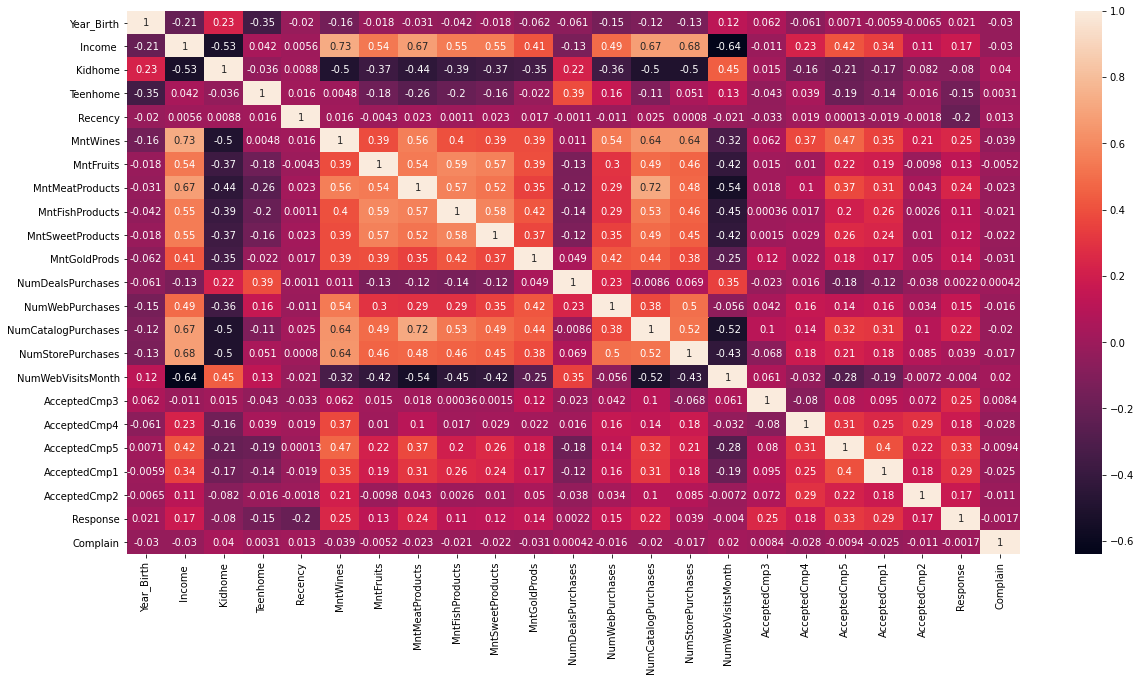

In [17]:
#correlation visualations
plt.figure(figsize=(20,10))
sns.heatmap(md.corr(),annot=True)
plt.show()

## which is the most successful campaign?

looks at a percentage value for the 6 campaigns

Text(0.5, 1.0, 'Marketing campaign success rate')

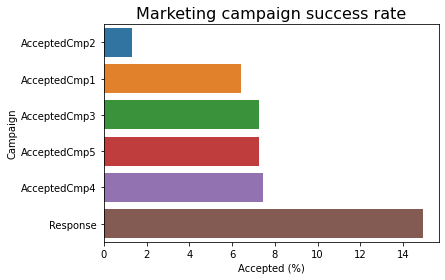

In [19]:
camaign_success = pd.DataFrame(md[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()
sns.barplot(x='Percent', y='index', data=camaign_success.sort_values('Percent'))
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16)

it seems that the recent campaign is the most successful campaign. while the campaign number 2 is least accepted

## Word Cloud for categorical data

education, marital status and country

In [26]:
#education
Educations_list = marketing_Data['Education'].unique().tolist()
Educations_list[:2]

#marital status
MaritalStatus_list=marketing_Data['Marital_Status'].unique().tolist()
MaritalStatus_list[:2]

    
#Country
Countries_list=marketing_Data['Country'].unique().tolist()
Countries_list[:2]


['SP', 'CA']

In [25]:
from wordcloud import WordCloud

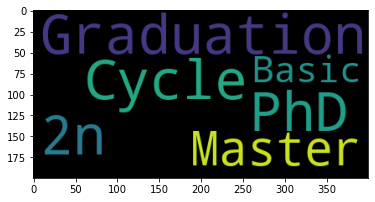

In [31]:
education = " ".join(Educations_list)
education[:5]

# create a word cloud for education
education_wordcloud = WordCloud().generate(education)
# show the created image of word cloud
plt.figure()
plt.imshow(education_wordcloud)
plt.show()

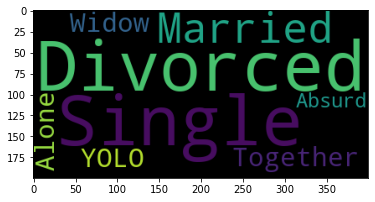

In [32]:
maritalst = " ".join(MaritalStatus_list)
maritalst[:5]

# create a word cloud for education
maritalst_wordcloud = WordCloud().generate(maritalst)
# show the created image of word cloud
plt.figure()
plt.imshow(maritalst_wordcloud)
plt.show()

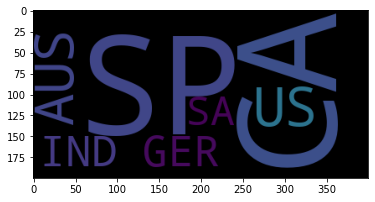

In [33]:
countries = " ".join(Countries_list)
countries[:5]

# create a word cloud for education
countries_wordcloud = WordCloud().generate(countries)
# show the created image of word cloud
plt.figure()
plt.imshow(countries_wordcloud)
plt.show()

## Country wise successful campaigns

In [35]:
from IPython.display import display
from colorama import Fore
import warnings
warnings.filterwarnings('ignore')

In [40]:
marketing_Data.groupby(['Country'])[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum().style.background_gradient(cmap=plt.get_cmap('Blues'))

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Country,,,,,,
AUS,7,0,9,6,13,23
CA,18,6,18,24,21,38
GER,7,2,10,11,8,17
IND,7,2,13,11,6,13
ME,0,0,1,0,0,2
SA,20,4,21,20,21,52
SP,78,16,83,89,89,176
US,7,0,8,6,5,13


SP has the highest acceptance of the campigns
while it seems ME has the least acceptance